# Import packages

In [11]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import torch
import torchvision
import os

In [2]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should return the number of GPUs

True
1


In [3]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)
print(torch.version.cuda)  # Check CUDA version
print(torch.backends.cudnn.version())  # Check cuDNN version

2.6.0+cu118
0.21.0+cu118
11.8
90100


In [4]:
print(torch.cuda.is_available())

True


In [5]:
model = YOLO("yolov8n.pt")  # Smallest YOLOv8 model
# model = YOLO("yolov8n-ppe.pt")  # YOLOv8 model trained on PPE dataset 
model.to("cuda")  # Use GPU

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [6]:
img = 'F:\coding_projects\hardhat_detection_on_construction_site\hardhat_images\maxresdefault.jpg'
results = model(img)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Myles McKay\AppData\Local\Temp\ipykernel_7320\1666863675.py:1: SyntaxWarning: invalid escape sequence '\c'
  img = 'F:\coding_projects\hardhat_detection_on_construction_site\hardhat_images\maxresdefault.jpg'


image 1/1 F:\coding_projects\hardhat_detection_on_construction_site\hardhat_images\maxresdefault.jpg: 384x640 2 persons, 36.1ms
Speed: 3.4ms preprocess, 36.1ms inference, 69.2ms postprocess per image at shape (1, 3, 384, 640)


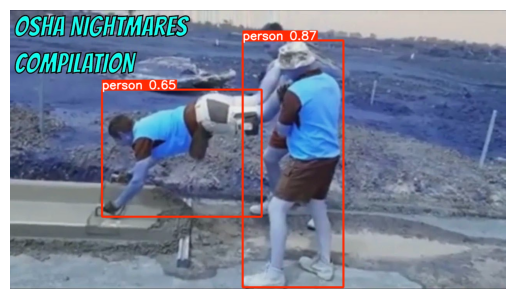

In [8]:
# Convert image to array and plot it
annotated_img = results[0].plot()

plt.imshow(annotated_img)
plt.axis("off")  # Hide axis
plt.show()

# Train YOLO on CHV dataset using YOLO_v8
# Data: 

In [9]:
# build a new model from YOLO YAML
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

Transferred 355/355 items from pretrained weights


# Make train test val split for the images directory

In [16]:
import os
import shutil

# Define dataset paths
dataset_root = "CHV_dataset"
image_dir = os.path.join(dataset_root, "images")
label_dir = os.path.join(dataset_root, "labels")

# Train-test split directories (already existing for labels)
train_label_dir = os.path.join(label_dir, "train")
val_label_dir = os.path.join(label_dir, "val")
test_label_dir = os.path.join(label_dir, "test")  # If you have a test split

# Corresponding image directories
train_image_dir = os.path.join(image_dir, "train")
val_image_dir = os.path.join(image_dir, "val")
test_image_dir = os.path.join(image_dir, "test")

# Create image directories if they don't exist
for d in [train_image_dir, val_image_dir, test_image_dir]:
    os.makedirs(d, exist_ok=True)

# Function to move images based on existing label structure
def move_images(label_subdir, image_subdir):
    label_files = [f for f in os.listdir(label_subdir) if f.endswith(".txt")]
    for label_file in label_files:
        image_file = label_file.replace(".txt", ".jpg")  # Adjust if using PNG/JPEG
        image_path = os.path.join(image_dir, image_file)
        if os.path.exists(image_path):  # Ensure the image exists before moving
            shutil.move(image_path, os.path.join(image_subdir, image_file))

# Move images based on labels
move_images(train_label_dir, train_image_dir)
move_images(val_label_dir, val_image_dir)
move_images(test_label_dir, test_image_dir)

print("Images successfully organized based on label directories!")


Images successfully organized based on label directories!


In [ ]:
import os
import shutil

# Define dataset root path
dataset_root = "F:/coding_projects/datasets/CHV_dataset"

# Define paths
image_splits = {
    "train": os.path.join(dataset_root, "datasplit/train.txt"),
    "val": os.path.join(dataset_root, "datasplit/valid.txt"),
    "test": os.path.join(dataset_root, "datasplit/test.txt"),
}
labels_all = os.path.join(dataset_root, "annotations")
labels_dir = os.path.join(dataset_root, "labels")

# Create train/val/test label folders if they don't exist
for split in image_splits.keys():
    os.makedirs(os.path.join(labels_dir, split), exist_ok=True)

# Move label files
for split, file_path in image_splits.items():
    with open(file_path, "r") as f:
        for line in f:
            image_name = os.path.basename(line.strip())  # Get image filename
            label_name = os.path.splitext(image_name)[0] + ".txt"  # Convert to label filename
            src_label = os.path.join(labels_all, label_name)
            dest_label = os.path.join(labels_dir, split, label_name)

            if os.path.exists(src_label):
                shutil.move(src_label, dest_label)
                print(f"Moved {label_name} → {dest_label}")
            else:
                print(f"Warning: No label found for {image_name}")

print("Label organization complete!")

Moved ppe_1106.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_1106.txt
Moved ppe_0738.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_0738.txt
Moved ppe_0259.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_0259.txt
Moved ppe_0697.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_0697.txt
Moved ppe_0729.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_0729.txt
Moved ppe_0019.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_0019.txt
Moved ppe_0072.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_0072.txt
Moved ppe_0841.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_0841.txt
Moved ppe_0661.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_0661.txt
Moved ppe_0554.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_0554.txt
Moved ppe_1227.txt → F:/coding_projects/datasets/CHV_dataset\labels\train\ppe_1227.txt
Moved ppe_1128.txt → F:/coding_projects/dat

In [20]:
# Training on CHV dataset
os.chdir(r'F:\coding_projects\datasets')
model.train(data=r'F:\coding_projects\datasets\CHV_dataset\dataset.yaml', epochs=100,  imgsz=640, device='cuda')

Ultralytics 8.3.82  Python-3.12.7 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3080, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=F:\coding_projects\datasets\CHV_dataset\dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train35, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

train: Scanning F:\coding_projects\datasets\CHV_dataset\labels\train... 1064 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1064/1064 [00:00<00:00, 2419.24it/s]


train: New cache created: F:\coding_projects\datasets\CHV_dataset\labels\train.cache


val: Scanning F:\coding_projects\datasets\CHV_dataset\labels\val... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<00:00, 1634.67it/s]

val: New cache created: F:\coding_projects\datasets\CHV_dataset\labels\val.cache


Plotting labels to f:\coding_projects\hardhat_detection_on_construction_site\runs\detect\train35\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to f:\coding_projects\hardhat_detection_on_construction_site\runs\detect\train35
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.17G      3.376      4.587       2.81        101        640: 100%|██████████| 67/67 [00:09<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  8.78it/s]


                   all        133        917    0.00226     0.0921    0.00277   0.000863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.71G      2.638      3.442      2.405        121        640: 100%|██████████| 67/67 [00:05<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.16it/s]


                   all        133        917      0.437     0.0902     0.0716     0.0309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.34G      2.123      2.627      2.041        106        640: 100%|██████████| 67/67 [00:05<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.21it/s]

                   all        133        917      0.245      0.351      0.226      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.42G      1.873      2.142      1.768         77        640: 100%|██████████| 67/67 [00:05<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.35it/s]

                   all        133        917      0.376      0.393      0.336      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.42G      1.771      1.925      1.687         89        640: 100%|██████████| 67/67 [00:05<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.92it/s]


                   all        133        917      0.582      0.511      0.504      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.23G      1.689      1.714      1.624         94        640: 100%|██████████| 67/67 [00:05<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.83it/s]

                   all        133        917      0.639      0.573      0.635       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.53G      1.645      1.551      1.568        139        640: 100%|██████████| 67/67 [00:05<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.34it/s]

                   all        133        917       0.76      0.603      0.701       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.35G      1.616      1.469      1.546        102        640: 100%|██████████| 67/67 [00:05<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.91it/s]

                   all        133        917      0.806      0.637      0.732      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.46G      1.565      1.391      1.513        126        640: 100%|██████████| 67/67 [00:05<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.53it/s]

                   all        133        917      0.786       0.68      0.768      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.75G      1.562      1.352      1.515         78        640: 100%|██████████| 67/67 [00:05<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.61it/s]

                   all        133        917      0.798      0.678      0.765      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.22G      1.513      1.285      1.487        115        640: 100%|██████████| 67/67 [00:05<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.65it/s]

                   all        133        917      0.817      0.654      0.762      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.44G      1.515      1.252      1.475        125        640: 100%|██████████| 67/67 [00:05<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.23it/s]

                   all        133        917      0.789       0.67      0.754      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.47G      1.492      1.233      1.471         70        640: 100%|██████████| 67/67 [00:05<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.88it/s]

                   all        133        917      0.817      0.725      0.795      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.53G      1.472      1.201      1.454         77        640: 100%|██████████| 67/67 [00:05<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.02it/s]

                   all        133        917      0.862      0.707      0.798      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.4G      1.485      1.167      1.448        161        640: 100%|██████████| 67/67 [00:05<00:00, 13.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.68it/s]

                   all        133        917      0.852      0.672      0.793      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.45G      1.452      1.161      1.436        130        640: 100%|██████████| 67/67 [00:05<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.03it/s]

                   all        133        917      0.884      0.726      0.811       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.67G      1.444       1.12      1.426        102        640: 100%|██████████| 67/67 [00:05<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.46it/s]

                   all        133        917      0.815      0.756        0.8       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.46G      1.455      1.146       1.44         95        640: 100%|██████████| 67/67 [00:05<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.70it/s]

                   all        133        917      0.872       0.72      0.815       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.54G      1.444      1.092       1.42        104        640: 100%|██████████| 67/67 [00:05<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.72it/s]

                   all        133        917      0.871      0.744      0.824      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.85G      1.435      1.091      1.421        106        640: 100%|██████████| 67/67 [00:05<00:00, 13.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.97it/s]

                   all        133        917      0.831      0.729      0.806      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.62G      1.429      1.056      1.411        125        640: 100%|██████████| 67/67 [00:05<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.32it/s]

                   all        133        917      0.847      0.761       0.82       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.3G      1.417      1.052      1.398         92        640: 100%|██████████| 67/67 [00:05<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.80it/s]

                   all        133        917      0.833      0.769      0.832      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.33G      1.404      1.032      1.388         68        640: 100%|██████████| 67/67 [00:05<00:00, 13.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.48it/s]

                   all        133        917      0.897      0.765      0.838      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.7G      1.391      1.024      1.378        107        640: 100%|██████████| 67/67 [00:05<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.00it/s]

                   all        133        917      0.873      0.776      0.835      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.3G      1.404      1.024      1.387        105        640: 100%|██████████| 67/67 [00:05<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.63it/s]

                   all        133        917      0.871      0.742      0.818      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.67G      1.377     0.9827      1.381        101        640: 100%|██████████| 67/67 [00:05<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.76it/s]

                   all        133        917      0.884      0.755      0.839      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.41G      1.395      1.001      1.386        137        640: 100%|██████████| 67/67 [00:05<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.69it/s]

                   all        133        917       0.89      0.774      0.847      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.5G      1.382     0.9926      1.372        107        640: 100%|██████████| 67/67 [00:05<00:00, 13.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.44it/s]

                   all        133        917      0.864      0.782      0.832      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.57G      1.372      0.962      1.364         91        640: 100%|██████████| 67/67 [00:05<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.85it/s]

                   all        133        917      0.823        0.8      0.841      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.48G      1.364     0.9552      1.388         55        640: 100%|██████████| 67/67 [00:05<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.78it/s]

                   all        133        917      0.836      0.785      0.835      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.33G       1.36     0.9477      1.355        140        640: 100%|██████████| 67/67 [00:05<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.56it/s]

                   all        133        917      0.847      0.773      0.837      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.27G      1.361     0.9511      1.381         58        640: 100%|██████████| 67/67 [00:05<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.74it/s]

                   all        133        917      0.873      0.766       0.83      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.32G      1.322     0.9084      1.341         83        640: 100%|██████████| 67/67 [00:05<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.80it/s]

                   all        133        917      0.881      0.788      0.856      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.3G      1.357     0.9345      1.363        122        640: 100%|██████████| 67/67 [00:05<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.49it/s]

                   all        133        917      0.883      0.741      0.833      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.35G      1.345     0.9146      1.339        113        640: 100%|██████████| 67/67 [00:05<00:00, 13.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.37it/s]

                   all        133        917       0.87      0.802      0.854      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.12G      1.335     0.9074      1.345         82        640: 100%|██████████| 67/67 [00:05<00:00, 13.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.82it/s]

                   all        133        917      0.859      0.792      0.844      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.37G      1.331     0.9037      1.352        110        640: 100%|██████████| 67/67 [00:05<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.79it/s]

                   all        133        917      0.898      0.774      0.848      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.3G      1.345      0.929      1.357         87        640: 100%|██████████| 67/67 [00:05<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.42it/s]

                   all        133        917      0.814      0.798      0.842      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.36G      1.326     0.9013      1.351         56        640: 100%|██████████| 67/67 [00:05<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.54it/s]

                   all        133        917      0.902      0.778      0.859      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.72G      1.325     0.9064      1.356        136        640: 100%|██████████| 67/67 [00:05<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.64it/s]

                   all        133        917      0.855      0.794      0.844      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.3G      1.322     0.8818      1.323        125        640: 100%|██████████| 67/67 [00:05<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.96it/s]

                   all        133        917      0.896      0.775      0.855      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.31G      1.318     0.8589      1.339         55        640: 100%|██████████| 67/67 [00:05<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.94it/s]

                   all        133        917      0.867      0.778      0.847      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.31G      1.331     0.8792      1.325        116        640: 100%|██████████| 67/67 [00:05<00:00, 13.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.57it/s]

                   all        133        917      0.893      0.789      0.856      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.55G      1.298     0.8585      1.317        117        640: 100%|██████████| 67/67 [00:05<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.22it/s]

                   all        133        917      0.887      0.776      0.851      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.23G      1.283     0.8393      1.297        170        640: 100%|██████████| 67/67 [00:05<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.09it/s]

                   all        133        917      0.901      0.792      0.863       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.41G      1.318     0.8633       1.32         75        640: 100%|██████████| 67/67 [00:05<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.15it/s]

                   all        133        917      0.894      0.798      0.853      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.57G      1.311     0.8525      1.326        111        640: 100%|██████████| 67/67 [00:05<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.80it/s]

                   all        133        917      0.895      0.802      0.865      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.35G       1.31      0.856      1.326         77        640: 100%|██████████| 67/67 [00:05<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.13it/s]

                   all        133        917       0.89      0.775      0.847      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.31G      1.278      0.832      1.305        128        640: 100%|██████████| 67/67 [00:05<00:00, 13.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.81it/s]

                   all        133        917      0.887      0.795      0.863      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.37G       1.28     0.8256      1.311         90        640: 100%|██████████| 67/67 [00:05<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.82it/s]

                   all        133        917      0.888      0.807      0.857      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.45G      1.286     0.8379      1.294         98        640: 100%|██████████| 67/67 [00:05<00:00, 13.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.06it/s]

                   all        133        917      0.877      0.804      0.858      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.74G      1.276     0.8149      1.305         72        640: 100%|██████████| 67/67 [00:05<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.43it/s]

                   all        133        917      0.895      0.807      0.869      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.51G      1.269     0.8235      1.293         72        640: 100%|██████████| 67/67 [00:05<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.34it/s]

                   all        133        917      0.893      0.805      0.863      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.59G       1.26     0.8151      1.288        139        640: 100%|██████████| 67/67 [00:05<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.76it/s]


                   all        133        917      0.894      0.802      0.863      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.45G      1.253     0.7931        1.3         55        640: 100%|██████████| 67/67 [00:05<00:00, 13.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.66it/s]

                   all        133        917      0.903      0.803      0.862      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.33G       1.27     0.8087      1.293         90        640: 100%|██████████| 67/67 [00:05<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.15it/s]

                   all        133        917      0.882      0.806      0.856      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.44G      1.255     0.7987      1.304         64        640: 100%|██████████| 67/67 [00:05<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.12it/s]

                   all        133        917      0.884      0.813      0.869       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.35G       1.25     0.8106      1.294         78        640: 100%|██████████| 67/67 [00:05<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.95it/s]

                   all        133        917      0.888      0.798      0.852      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.53G      1.251     0.7932      1.277        138        640: 100%|██████████| 67/67 [00:05<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.32it/s]

                   all        133        917      0.886      0.792      0.859      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.5G      1.256     0.7931      1.298        100        640: 100%|██████████| 67/67 [00:05<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.60it/s]

                   all        133        917      0.906       0.79      0.861      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.34G      1.255      0.789      1.282         90        640: 100%|██████████| 67/67 [00:05<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.78it/s]

                   all        133        917      0.882      0.818      0.867      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.4G      1.235     0.7875      1.286         80        640: 100%|██████████| 67/67 [00:05<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.54it/s]

                   all        133        917      0.896      0.818      0.871      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.24G      1.253     0.7818      1.282        101        640: 100%|██████████| 67/67 [00:05<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.00it/s]

                   all        133        917      0.884      0.818      0.865      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.85G      1.232     0.7605       1.27         94        640: 100%|██████████| 67/67 [00:05<00:00, 13.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.73it/s]

                   all        133        917      0.888      0.797      0.862      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.62G      1.214     0.7547      1.266         52        640: 100%|██████████| 67/67 [00:05<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.57it/s]

                   all        133        917       0.88      0.806      0.868      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.54G      1.212     0.7539       1.27        108        640: 100%|██████████| 67/67 [00:05<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.13it/s]

                   all        133        917      0.914      0.772      0.857      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.36G      1.235      0.778      1.279         80        640: 100%|██████████| 67/67 [00:05<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.93it/s]

                   all        133        917      0.912      0.775       0.86       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.28G      1.226     0.7493      1.274         77        640: 100%|██████████| 67/67 [00:05<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.07it/s]

                   all        133        917      0.899      0.799      0.864      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.4G      1.205     0.7382      1.252         89        640: 100%|██████████| 67/67 [00:05<00:00, 13.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.98it/s]

                   all        133        917      0.895      0.795      0.864      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.31G      1.222     0.7616      1.259        139        640: 100%|██████████| 67/67 [00:05<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.62it/s]

                   all        133        917      0.896      0.803      0.867      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.24G      1.207       0.76      1.257         89        640: 100%|██████████| 67/67 [00:05<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.95it/s]

                   all        133        917      0.892      0.794      0.862      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.84G      1.216     0.7407       1.26        125        640: 100%|██████████| 67/67 [00:05<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.67it/s]

                   all        133        917      0.883       0.81      0.865      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.39G      1.199      0.737      1.258         94        640: 100%|██████████| 67/67 [00:05<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.77it/s]

                   all        133        917      0.886      0.814      0.866      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.55G      1.194     0.7333      1.256         72        640: 100%|██████████| 67/67 [00:05<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.28it/s]

                   all        133        917      0.873      0.806      0.862      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.66G        1.2     0.7322      1.271        114        640: 100%|██████████| 67/67 [00:05<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.71it/s]

                   all        133        917       0.88      0.811      0.868      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.34G      1.206     0.7383      1.254        126        640: 100%|██████████| 67/67 [00:05<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.52it/s]

                   all        133        917      0.903      0.804       0.87      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.42G      1.177     0.7207      1.249         48        640: 100%|██████████| 67/67 [00:05<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.75it/s]

                   all        133        917      0.873      0.811      0.866      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.44G      1.203     0.7302      1.254         88        640: 100%|██████████| 67/67 [00:05<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.80it/s]

                   all        133        917      0.888      0.794      0.865      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.24G      1.191     0.7184      1.242         86        640: 100%|██████████| 67/67 [00:05<00:00, 13.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.87it/s]

                   all        133        917      0.904      0.774      0.856      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.42G      1.176     0.7222      1.243         80        640: 100%|██████████| 67/67 [00:05<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.79it/s]

                   all        133        917      0.893      0.797      0.862      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.4G       1.17     0.7164       1.23        150        640: 100%|██████████| 67/67 [00:05<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  9.68it/s]

                   all        133        917      0.908      0.801      0.869      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.52G      1.172     0.7073      1.236        121        640: 100%|██████████| 67/67 [00:05<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.63it/s]

                   all        133        917      0.892      0.792      0.861      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.33G      1.179     0.7093       1.24        157        640: 100%|██████████| 67/67 [00:05<00:00, 13.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.07it/s]

                   all        133        917      0.899      0.807       0.87      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.48G      1.163     0.7028      1.245         95        640: 100%|██████████| 67/67 [00:05<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.10it/s]

                   all        133        917      0.881      0.828      0.873      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.17G       1.18     0.7091      1.238         70        640: 100%|██████████| 67/67 [00:05<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.42it/s]

                   all        133        917      0.884      0.805      0.868      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.53G      1.173     0.7093      1.244        101        640: 100%|██████████| 67/67 [00:05<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.64it/s]

                   all        133        917      0.905       0.81      0.871       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       2.4G      1.154     0.7016      1.234        132        640: 100%|██████████| 67/67 [00:05<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.36it/s]

                   all        133        917      0.884      0.804      0.871      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.45G      1.177     0.7057       1.24        117        640: 100%|██████████| 67/67 [00:05<00:00, 13.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.94it/s]

                   all        133        917      0.906        0.8      0.872      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.46G      1.169     0.6934      1.238        106        640: 100%|██████████| 67/67 [00:05<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.93it/s]

                   all        133        917      0.903      0.808      0.876      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.62G      1.144     0.6947      1.229        120        640: 100%|██████████| 67/67 [00:05<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.85it/s]

                   all        133        917      0.887      0.808      0.873      0.531


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.3G      1.153     0.6542      1.244         59        640: 100%|██████████| 67/67 [00:05<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.65it/s]

                   all        133        917      0.905       0.82      0.875      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.27G       1.13     0.6341      1.236         73        640: 100%|██████████| 67/67 [00:05<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.08it/s]


                   all        133        917       0.91      0.805      0.866      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.2G      1.128     0.6212      1.229         66        640: 100%|██████████| 67/67 [00:04<00:00, 13.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.61it/s]

                   all        133        917      0.895      0.793      0.864      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.2G      1.123      0.622      1.232         56        640: 100%|██████████| 67/67 [00:05<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.05it/s]

                   all        133        917      0.908      0.807      0.869      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.3G      1.118      0.622      1.223         49        640: 100%|██████████| 67/67 [00:04<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 10.35it/s]

                   all        133        917      0.906       0.81      0.876       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.27G      1.112     0.6155      1.222         75        640: 100%|██████████| 67/67 [00:04<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.32it/s]

                   all        133        917        0.9      0.813      0.876      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.17G      1.114     0.6118      1.215         49        640: 100%|██████████| 67/67 [00:06<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.21it/s]

                   all        133        917      0.898      0.799      0.869      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.17G      1.098     0.6036      1.216         63        640: 100%|██████████| 67/67 [00:04<00:00, 13.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.38it/s]

                   all        133        917      0.903        0.8      0.869      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.36G      1.107     0.6082      1.218         63        640: 100%|██████████| 67/67 [00:04<00:00, 13.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.39it/s]

                   all        133        917      0.897      0.794      0.868      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.27G      1.107     0.6084      1.214         38        640: 100%|██████████| 67/67 [00:04<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00, 11.52it/s]

                   all        133        917      0.888      0.803      0.867      0.526



100 epochs completed in 0.171 hours.
Optimizer stripped from f:\coding_projects\hardhat_detection_on_construction_site\runs\detect\train35\weights\last.pt, 6.2MB
Optimizer stripped from f:\coding_projects\hardhat_detection_on_construction_site\runs\detect\train35\weights\best.pt, 6.2MB

Validating f:\coding_projects\hardhat_detection_on_construction_site\runs\detect\train35\weights\best.pt...
Ultralytics 8.3.82  Python-3.12.7 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3080, 12288MiB)
YOLOv8n summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]


                   all        133        917      0.881      0.828      0.873      0.532
                person        133        387      0.905      0.876      0.921      0.579
                  vest         61        171      0.828      0.807      0.854      0.507
           blue helmet         25         49       0.86      0.753      0.792      0.501
            red helmet         29         48      0.833      0.833      0.846      0.499
          white helmet         53         99       0.94      0.879      0.932      0.617
         yellow helmet         70        163      0.918      0.821      0.895      0.489
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to f:\coding_projects\hardhat_detection_on_construction_site\runs\detect\train35


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000129AD9105C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

# Use YOLO_ppe custom trained

In [ ]:
model = YOLO('F:/coding_projects/hardhat_detection_on_construction_site/runs/detect/train35/weights/best.pt').to('cuda')
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s


image 1/1 F:\coding_projects\hardhat_detection_on_construction_site\hardhat_images\maxresdefault.jpg: 384x640 2 persons, 1 vest, 39.4ms
Speed: 2.2ms preprocess, 39.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


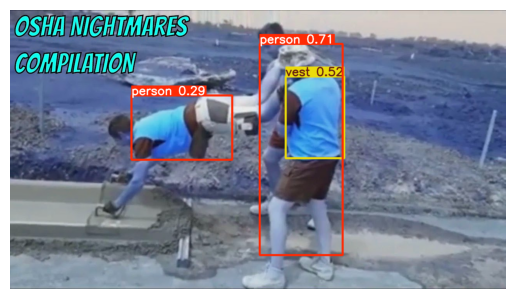

In [27]:
test_results = model('F:/coding_projects/hardhat_detection_on_construction_site/hardhat_images/maxresdefault.jpg')

# Convert image to array and plot it
annotated_img = test_results[0].plot()

plt.imshow(annotated_img)
plt.axis("off")  # Hide axis
plt.show()

In [32]:
# test_vid_results = model('F:/coding_projects/hardhat_detection_on_construction_site/hardhat_videos/Construction_vid_0.mp4')